In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import xgboost
from xgboost import XGBClassifier

In [8]:
df = pd.read_csv("./cleaned_titanic_data.csv")
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [9]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [10]:
x = df.iloc[:, 1 :]

In [11]:
x

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [12]:
y = df['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
xgb.score(X_train, y_train)

0.9592696629213483

In [16]:
xgb.score(X_test, y_test)

0.8044692737430168

In [17]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

In [18]:
y_pred_test

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [19]:
import seaborn as sns

In [20]:
confusion_matrix(y_train, y_pred_train)

array([[439,   5],
       [ 24, 244]], dtype=int64)

<Axes: >

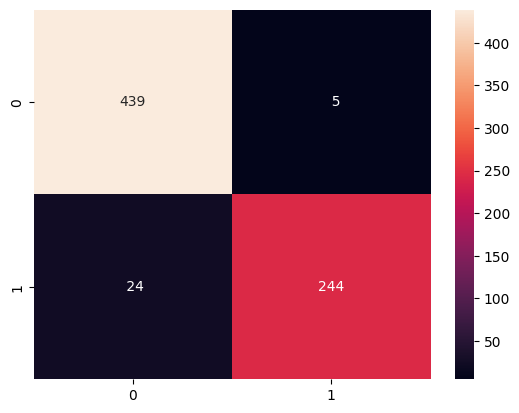

In [21]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='3.0f')

In [22]:
accuracy_score(y_train, y_pred_train)

0.9592696629213483

In [23]:
confusion_matrix(y_test, y_pred_test)

array([[88, 17],
       [18, 56]], dtype=int64)

<Axes: >

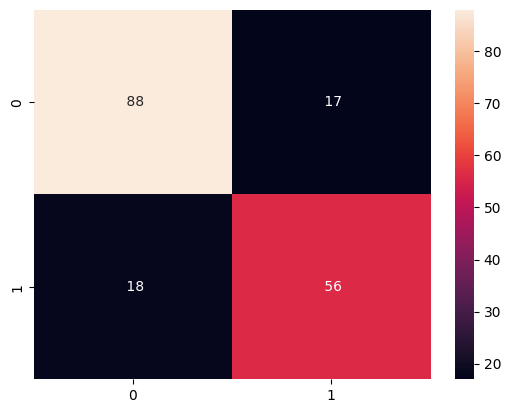

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='3.0f')

In [25]:
xg = XGBClassifier(gamma= 0.5, reg_alpha= 0.6, reg_lambda=0.3)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
xg.score(X_train, y_train)

0.875

In [27]:
xg.score(X_test, y_test)

0.8100558659217877